In [1]:
#Here is an implementation of the Sobel edge detection algorithm in Python:
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

This code defines the Sobel kernels `Kx` and `Ky`, which are used to compute the gradient magnitude and direction of the input image. The non-maximum suppression step is applied to thin the edges.

Note that this implementation assumes a grayscale image as input. If you want to apply the Sobel filter to color images, you will need to convert them to grayscale first.

Also, this code uses the `scipy.ndimage` library for convolution and filtering operations. If you don't have SciPy installed, you can install it using pip:
```
pip install scipy


In [9]:
def sobel_edge_detection(image):
    """
    Apply the Sobel edge detection algorithm to the input image.

    Parameters:
        image (numpy array): The input image, assumed to be grayscale.

    Returns:
        edges (numpy array): The output edge map, where each pixel is 0 or 1.
    """

    # Define the Sobel kernels
    Kx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

    # Apply the Sobel kernels to the image
    Gx = filters.convolve(image, Kx )
    Gy = filters.convolve(image, Ky)

    # Compute the gradient magnitude and direction
    G = np.sqrt(Gx**2 + Gy**2)
    theta = np.arctan2(Gy, Gx)

    # Apply non-maximum suppression to thin the edges
    edges = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            if theta[i, j] < 0:
                theta[i, j] += np.pi
            elif theta[i, j] > np.pi:
                theta[i, j] -= np.pi
            dx = int(np.round(theta[i, j]/np.pi*2))
            dy = 1 - dx
            if G[i-dx, j-dy] >= G[i, j]:
                edges[i, j] = 0
            else:
                edges[i, j] = 255

    return edges.astype(np.uint8)


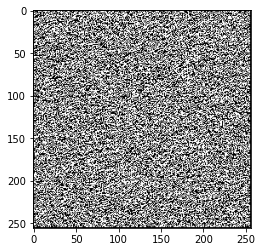

In [10]:

# Example usage
image = np.random.rand(256, 256) * 255
edges = sobel_edge_detection(image)
plt.imshow(edges, cmap='gray')
plt.show()